# Self Organizing Map

In [14]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
# Importing the dataset
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [16]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [17]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 1000)

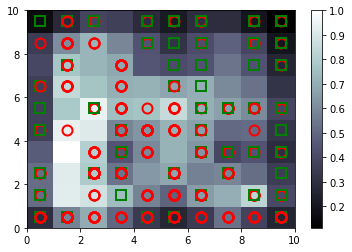

In [18]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [19]:
# Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(8,1)], mappings[(6,8)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [20]:
np.int32(frauds)

array([[15786237,        0,       19,        0,        1,        6,
               4,        0,        1,        0,        0,        1,
               2,      160,        1],
       [15767358,        0,       49,       13,        2,        4,
               8,        8,        1,        0,        0,        1,
               2,        0,        1],
       [15567839,        0,       28,        3,        2,        3,
               5,        0,        1,        0,        0,        1,
               2,      171,        1],
       [15642336,        0,       57,        0,        2,        3,
               5,        1,        1,        0,        0,        1,
               2,      252,     2198],
       [15740487,        0,       49,        1,        2,        5,
               3,        0,        1,        0,        0,        1,
               2,      100,       28],
       [15811742,        0,       36,        5,        2,        9,
               4,        5,        1,        0,        0,